# Práctica Minería de Datos

**Este documento contiene la parte práctica de la tarea de evaluación del módulo de Minería de Datos.** 

**La idea es que vayas avanzando en el documento y completando códigos (asegurando ejecutar para que se vean las salidas) y preguntas asociadas.**

**Una vez terminado, lo guardas con el nombre "PracticaMineria_NombreApellido.ipynb". Descargalo también con el mismo nombre pero en extensión HTML y adjunta ambos archivos a la entrega.** 

**A disfrutar del proceso!**

## Pregunta 1

Indica en el siguiente chunk el código necesario para importar el conjunto de datos **"FEV_data.csv"** y muestra la información del archivo. 

Información sobre el archivo aquí: 
https://view.officeapps.live.com/op/view.aspx?src=http%3A%2F%2Fwww.emersonstatistics.com%2Fdatasets%2Ffev.doc&wdOrigin=BROWSELINK

In [29]:
# Lectura del archivo
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

fev = pd.read_csv('C:\\Users\\leorq\\Documents\\LEO\\MASTER UCM DATA SCIENCE, BIG DATA & BUSINESS ANALYTICS\\MODULO 7 - Minería de Datos y Modelización Predictiva\\Tarea Minería de datos 2023-2024\\Práctica Python\\Datos\\FEV_data.csv')

# Información
fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   seqnbr  654 non-null    int64  
 1   subjid  654 non-null    int64  
 2   age     654 non-null    int64  
 3   fev     654 non-null    float64
 4   height  654 non-null    float64
 5   sex     654 non-null    int64  
 6   smoke   654 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 35.9 KB


In [2]:
fev.head()

,seqnbr,subjid,age,fev,height,sex,smoke
0,1,301,9,1.708,57.0,2,2
1,2,451,8,1.724,67.5,2,2
2,3,501,7,1.720,54.5,2,2
3,4,642,9,1.558,53.0,1,2
4,5,901,9,1.895,57.0,1,2


¿Cuantos registros y variables tiene el archivo? 

**Respuesta**: Tiene 654 registros (no presenta valores perdidos) y 7 variables.


¿Tienen las variables el tipo correcto en relación a su lógica naturaleza?

**Respuesta**: No, no todas las variable tienen el tipo correcto en relación a su lógica naturaleza. Ya que las variables sex y smoke son variables dicotómicas presentando solo dos valores posible en cada una (1 y 2). Por lo tanto, son variables categóricas y debemos realizar este cambio. Primero haremos un .nunique() para confirmar que solo existen dos valores unicos para esas variables.


In [3]:
# Corrección de tipos en caso de necesidad
fev.nunique()

seqnbr    654
subjid    654
age        17
fev       575
height     56
sex         2
smoke       2
dtype: int64

In [4]:
to_factor = list(fev.loc[:,fev.nunique() <= 10]);
print(to_factor)

fev[to_factor] = fev[to_factor].astype('category')

fev.info()

['sex', 'smoke']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   seqnbr  654 non-null    int64   
 1   subjid  654 non-null    int64   
 2   age     654 non-null    int64   
 3   fev     654 non-null    float64 
 4   height  654 non-null    float64 
 5   sex     654 non-null    category
 6   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(3)
memory usage: 27.2 KB


En cuanto al rol de las variables, ¿son todas válidas como predictores en modelo? 

**Respuesta**: Las variables "seqnbr" y "subjid" son variables no validas como predictores en el modelo, ya que ambas son variables identificadoras numericas para cada caso de estudio del volume expiratorio forzado y no contienen información relevante para predecir la función pulmonar. Variables validas como predictoras son: Age, Height, Sex, Smoke.

In [5]:
# Eliminación de variables por rol en caso de necesidad
fev.drop(['seqnbr', 'subjid'], axis=1, inplace=True)

In [6]:
fev.describe()

,age,fev,height
count,654.000000,654.000000,654.000000
mean,9.931193,2.636780,61.143578
std,2.953935,0.867059,5.703513
min,3.000000,0.791000,46.000000
25%,8.000000,1.981000,57.000000
50%,10.000000,2.547500,61.500000
75%,12.000000,3.118500,65.500000
max,19.000000,5.793000,74.000000


In [7]:
fev.describe(exclude=np.number)

,sex,smoke
count,654,654
unique,2,2
top,1,2
freq,336,589


In [8]:
fev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     654 non-null    int64   
 1   fev     654 non-null    float64 
 2   height  654 non-null    float64 
 3   sex     654 non-null    category
 4   smoke   654 non-null    category
dtypes: category(2), float64(2), int64(1)
memory usage: 17.0 KB


## Pregunta 2

Sabiendo que la variable objetivo es *Fev*. Presenta un gráfico con las relaciones de asociación de los predictores frente a Fev. 

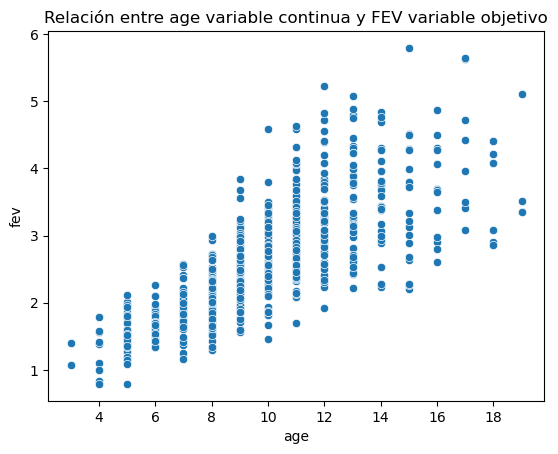

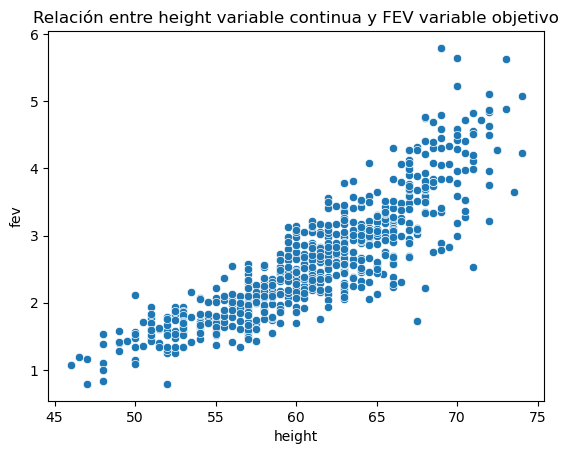

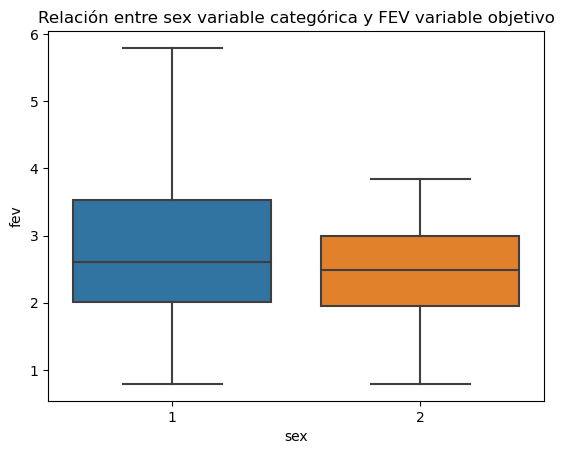

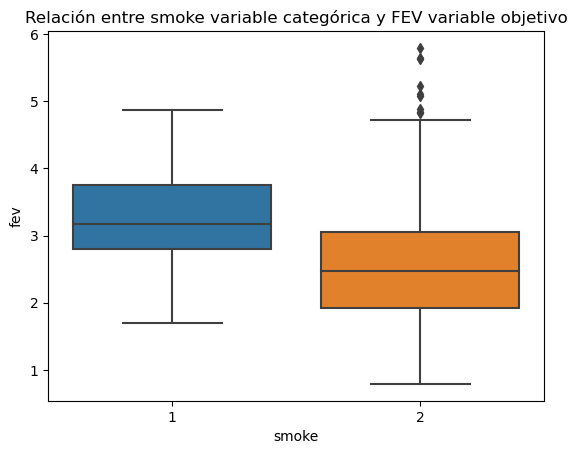

In [9]:
# Gráfico de relaciones con la objetivo
import seaborn as sns
import matplotlib.pyplot as plt

# Para los predictores de variables continuas numéricas
predictor_continuas = ['age', 'height']
for predictor in predictor_continuas:
    sns.scatterplot(data=fev, x=predictor, y='fev')
    plt.title(f'Relación entre {predictor} variable continua y FEV variable objetivo')
    plt.show()
    
# Para los predictores de variables categóricas
predictor_categoricas = ['sex', 'smoke']
for predictor in predictor_categoricas:
    sns.boxplot(data=fev, x=predictor, y='fev')
    plt.title(f'Relación entre {predictor} variable categórica y FEV variable objetivo')
    plt.show()

¿Cuales son las 3 variables que elegirías para tu primer modelo de regresión en base a esta información?

**Respuesta**: Las 3 variables que elegiría son: Age, Height y Sex.
-Age: El gráfico de dispersión nos muestra una tendencia positiva en la relación de Age y FEV, ya que a medida que la edad aumenta también aumenta el FEV, lo que parece ser lógico, ya que a medida que crecemos, la capacidad pulmonar tiende a aumentar.
-Height: El gráfico de dispersión nos muestra una tendencia más fuerte positiva con la relación entre Height y FEV, a medida que aumenta la altura, aumenta también el FEV. Mientras más tamaño del cuerpo, mayor el tamaño de los pulmones y su capacidad.
-Sex: En el boxplot o diagrama de caja y bigotes, podemos ver que hay una relacion entre el Sexo y el FEV. Se muestra una diferencia clara entre hombres y mujeres, donde los hombres muestran una mayor capacidad pulmonar que las mujeres. 

La variable Smoke podemos observar que 589 no fuman de 654 personas, así que presenta poca influencia entre si fumas o no fumas en este estudio de la FEV, ya que solo evaluariamos 65 personas para saber si fumar realmente afecta al FEV, tal vez sea un porcentaje muy bajo de personas.

## Pregunta 3

Ajusta el modelo de regresión que contiene los 3 predictores que has decidido en el apartado anterior en el propio conjunto de entrenamiento (no hace falta hacer partición) y muestra el summary de dicho modelo. 

In [10]:
import statsmodels.api as sm

# Ajuste de modelo 
# Selección las variables predictoras y la variable objetivo
X = fev[['age', 'height', 'sex']]
y = fev['fev']

# Agregar constante al modelo (intercepto)
X = sm.add_constant(X)

# Ajustar modelo de regresion lineal con OLS
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    fev   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     744.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.05e-210
Time:                        09:39:40   Log-Likelihood:                -346.99
No. Observations:                 654   AIC:                             702.0
Df Residuals:                     650   BIC:                             719.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1263      0.242    -17.058      0.0

 A la vista de los valores de ajuste, ¿qué porcentaje de variabilidad explicada tiene el modelo? Interpreta el parámetro estimado de la *altura*.

**Respuesta**: El coeficiente de R^2 nos proporciona una medida en donde las variables predictoras o independientes en el modelo de regresión explican una gran proporción de la variabilidad de la variable dependiente en nuestro caso FEV. El valor de R^2 es de 0.775. Esto significa que el modelo puede explicar el 77.5% la variabilidad de la variable FEV. Este valor es alto por lo que indica que el modelo tiene buen ajuste. Por otra parte, el R^2 ajustado es de 0.774 es un buen indicativo ya que R^2 ajustado alto y cercano al R^2 regular es una señal de que no estamos incluyendo predictores innecesarios.

En cuanto a la interpretación del parámetro estimado de la altura, nos da un coeficiente de 0.1046 y un error estándar muy bajo de 0.005, lo que significa que por cada unidad adicional en la altura, el FEV aumenta en promedio 0.1046 unidades. La t-statistic es de 21.986 y el P>|t| de 0, indican un efecto estadisticamente significativo. 

Siendo este coeficiente para la altura bastante positivo, lo que confirma que hay una relación positiva entre altura y FEV, a mayor altura, mayor el FEV esperado. 

## Pregunta 4

Aplica validación cruzada repetida para tu modelo con nuestra querida función *cross_val_lin* y una semilla conformada por los 4 últimos dígitos de tu documento de identidad. Muestra el boxplot de sesgo-varianza de las estimaciones. 

Coeficioente de determinación R2 promedio: 0.766 (0.044)


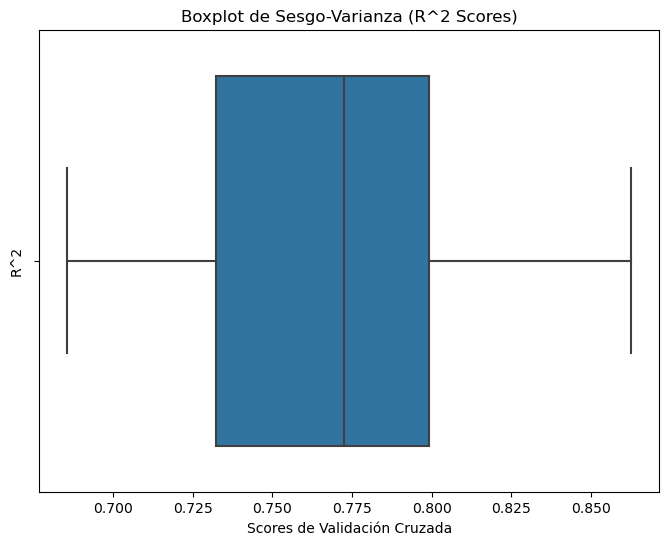

In [11]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LinearRegression
import patsy 


# Definir la funcion cross_val_lin
def cross_val_lin(formula,data, seed=5146):
    y, X = patsy.dmatrices(formula, data, return_type='dataframe')
    
    # Modelo de Regresión lineal
    model = LinearRegression()
    
    # Definir el método de validación cruzada
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=seed)

    # Validación cruzada
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv)

    # Calcular el sesgo y la varianza
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    print('Coeficioente de determinación R2 promedio: %.3f (%.3f)' % (mean_score, std_score))
    
    return scores

# Aplicar funcion y formula especifica
formula = 'fev ~ age + height + C(sex)'
scores = cross_val_lin(formula, fev, seed=5146)

# Boxplot sesgo-varianza
plt.figure(figsize=(8,6))
sns.boxplot(x=scores)
plt.title('Boxplot de Sesgo-Varianza (R^2 Scores)')
plt.xlabel('Scores de Validación Cruzada')
plt.ylabel('R^2')
plt.show()

A la vista de los resultados. ¿Está sobreajustando tu modelo al conjunto de entrenamiento?

**Respuesta**: El coeficiente de determinación R^2 promedio es de 0.766 y una desviación estándar de 0.044, no muestra evidencias claras de sobreajuste. La consistencia en los valores R^2 a través de las distintas particiones de conjunto de datos, como se refleja en la baja variabilidad mostrada en el boxplot, sugiere que el modelo tiene una capacidad de generalización estable. Considerando la simplicidad del modelo, que incluye solo tres predictores relevantes, es poco probable que el modelo sea sobreajustado.  

## Pregunta 5

Indica el código necesario para leer el conjunto de datos **"IPI_Esp.xlsx"** y muestra su cabeza.

In [12]:
# Lectura de datos IPI
pd.set_option("display.max_rows", None, "display.max_columns", None)

ipi = pd.read_excel('C:\\Users\\leorq\\Documents\\LEO\\MASTER UCM DATA SCIENCE, BIG DATA & BUSINESS ANALYTICS\\MODULO 7 - Minería de Datos y Modelización Predictiva\\Tarea Minería de datos 2023-2024\\Práctica Python\\Datos\\IPI_Esp.xlsx')

# Primeras filas
ipi.head()

,Date,IPI Nacional
0,1975M01,70.658
1,1975M02,72.180
2,1975M03,75.732
3,1975M04,74.844
4,1975M05,74.210


## Pregunta 6

Convierte el conjunto en una serie temporal legible para Python y representa gráficamente la evolución. 

In [13]:
# Conversión a serie temporal legible
ipi['Date'] = ipi['Date'].str.replace('M', '-')
ipi['Date'] = ipi['Date'].str.strip()

In [14]:
# Convertir en date-time
ipi['Date'] = pd.to_datetime(ipi['Date'], format='%Y-%m')
ipi.set_index('Date', inplace=True)

In [15]:
# Mostrar valores de serie
ipi.head()

,IPI Nacional
Date,
1975-01-01,70.658
1975-02-01,72.180
1975-03-01,75.732
1975-04-01,74.844
1975-05-01,74.210


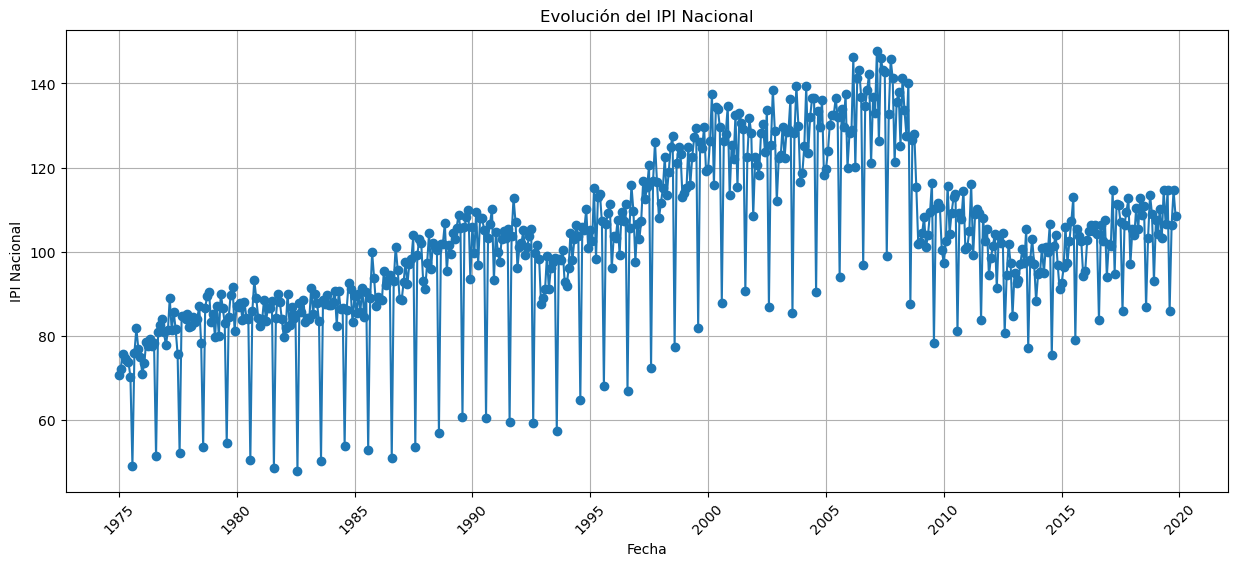

In [16]:
# Gráfico de evolución del IPI
plt.figure(figsize=(15, 6))
plt.plot(ipi.index, ipi['IPI Nacional'], marker='o', linestyle='-')
plt.title('Evolución del IPI Nacional')
plt.xlabel('Fecha')
plt.ylabel('IPI Nacional')
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

¿Qué componentes de la serie se pueden intuir en el gráfico?

**Respuesta**: En el gráfico de la serie temporal del IPI Nacional se pueden intuir los siguientes componentes:

-Tendencia: Hay una tendencia clara en la serie, indicada por el movimiento general al alza del IPI Nacional a lo largo de los años. Podemos observar la tendencia alcista desde 1975 hata mas o menos 2007-2008, aunque hubo un pequeño declive entre 1993 y 1994, que luego se repite ese movimiento decreciente despues del 2009.

-Estacionalidad: Parece haber patrones regulares que sugieren una estacionalidad dentro de cada año, lo que podría indicar variaciones estacionales en la producción industrial.

-Componente Irregular: También hay fluctuaciones irregulares o aleatorias en la serie, que podrían deberse a eventos no recurrentes o a ruidos inherentes a los datos.

## Pregunta 7

Toma una partición con ventana de entrenamiento (todo el histórico hasta diciembre de 2017) y prueba (2018 y 2019). Ajusta el modelo de suavizado que consideres más adecuado a la luz de las características de la serie. Evalua el modelo en términos de error y adecuación de los residuos. ¿El modelo satisface las condiciones residuales en cuanto a  autocorrelaciones?

C:\Users\leorq\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error cuadrático medio (MSE): 15.47578405997624
Error cuadrático medio raíz (RMSE): 3.9339273074087475


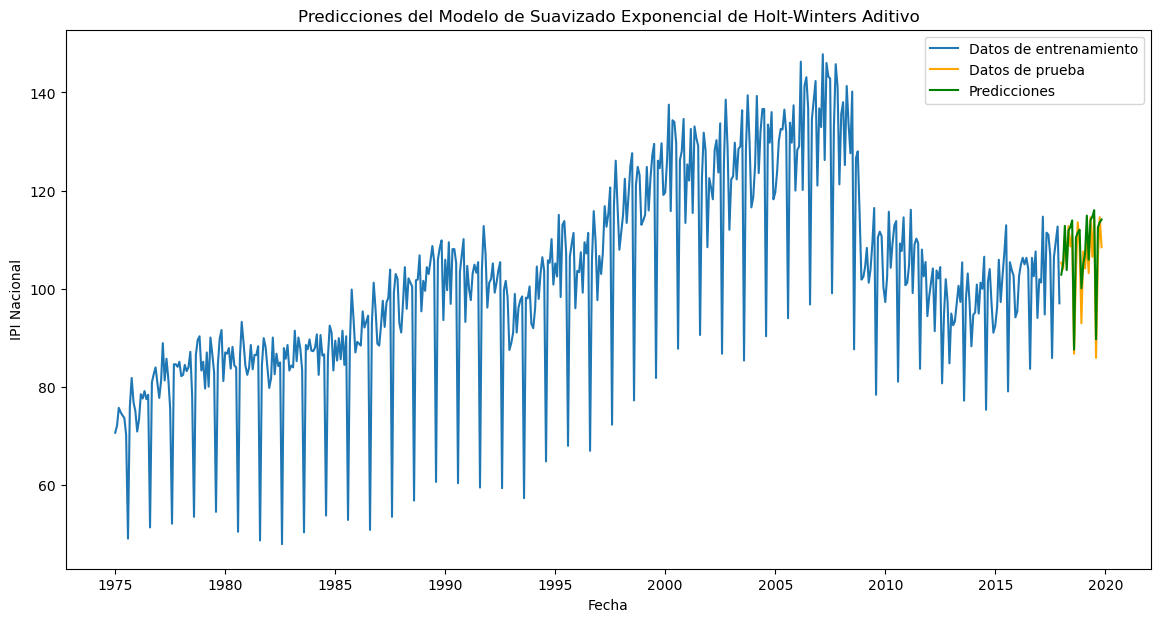

<Figure size 1000x600 with 0 Axes>

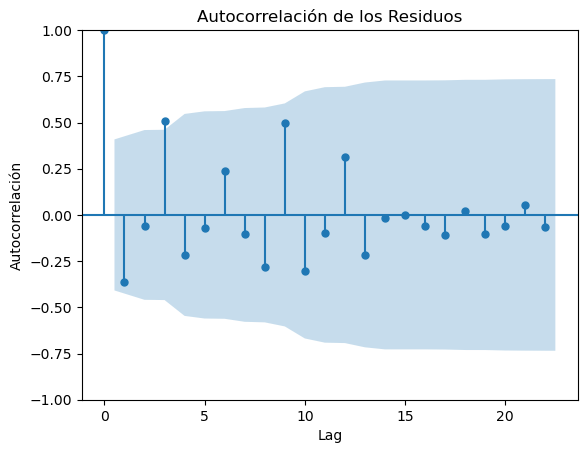

In [17]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error

# Partición de datos
entrenamiento = ipi.loc[ipi.index < '2018-01-01']
prueba = ipi.loc['2018-01-01':'2019-12-31']

# Ajuste de modelo de suavizado
# Selecciono el modelo de Holt-Winters aditivo porque observo tendencia y estacionalidad
modelo = ExponentialSmoothing(
    entrenamiento['IPI Nacional'],
    trend = 'add',
    seasonal = 'add',
    seasonal_periods = 12).fit()

# Predicción para el conjunto de prueba
predicciones = modelo.forecast(steps=len(prueba))

# Evaluación del modelo
# Calcular el error cuadrático medio (MSE) como una medida del error
mse = mean_squared_error(prueba['IPI Nacional'], predicciones)
rmse = np.sqrt(mse)
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Error cuadrático medio raíz (RMSE): {rmse}')

# Gráfico de las predicciones vs los datos reales
plt.figure(figsize=(14, 7))
plt.plot(entrenamiento.index, entrenamiento['IPI Nacional'], label='Datos de entrenamiento')
plt.plot(prueba.index, prueba['IPI Nacional'], label='Datos de prueba', color='orange')
plt.plot(prueba.index, predicciones, label='Predicciones', color='green')
plt.title('Predicciones del Modelo de Suavizado Exponencial de Holt-Winters Aditivo')
plt.xlabel('Fecha')
plt.ylabel('IPI Nacional')
plt.legend()
plt.show()

# Cálculo de residuos y limpieza de posibles NaN
residuos = prueba['IPI Nacional'] - predicciones
residuos = residuos.dropna()  # Limpieza

# Seleccionar un número seguro de lags que no exceda la longitud de la serie de residuos
num_lags = min(40, len(residuos)-1)

# Gráfico de autocorrelación para chequear autocorrelaciones en residuos
plt.figure(figsize=(10, 6))
plot_acf(residuos, lags=num_lags)
plt.title('Autocorrelación de los Residuos')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.show()

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Prueba de Ljung-Box para los residuos
lb_test = acorr_ljungbox(residuos, lags=[12], return_df=True)
print(lb_test)

     lb_stat  lb_pvalue
12  37.59173   0.000179


**Respuesta**: De acuerdo con el modelo de suavizado utilizado que fue el de Holt-Winters aditivo seleccionado para el IPI Nacional nos muestra un RMSE de 3.93 y un MSE de 15.48 pareciendo el modelo tener un error de predicción moderado. las predicciones del modelo se desvían aproximadamente 3.93 unidades del valor real. Puede considerarse aceptable.

Relativamente al gráfico de Autocorrelaciones muestra algunas autocorrelaciones significativas, especialmente en el primer lag, que podría ser típico de la autocorrelación que se espera en un conjunto de datos sin modelar. Sin embargo, la sombra azul representa intervalos de confianza, nos refleja que algunas correlaciones estan por fuera de lo que se esperaría.

La prueba de Ljung-Box tiene un p-valor aproximadamente de 0.000179, para los primeros 12 lags, lo que indica que hay una evidencia estadisticamente significativa de que los residuos están autocorrelacionados, siendo no muy deseable. Queriendo que los residuos sean ruido blanco, lo que implica aleatoriedad y ausencia de patrones predecibles no capturados por el modelo.

## Pregunta 8

Presenta los correlogramas simple y parcial de la serie diferenciada en lo regular y estacional para el conjunto de entrenamiento. 

<Figure size 1200x600 with 0 Axes>

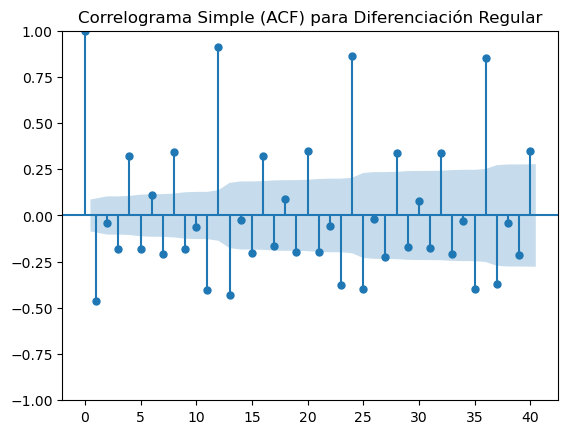

<Figure size 1200x600 with 0 Axes>

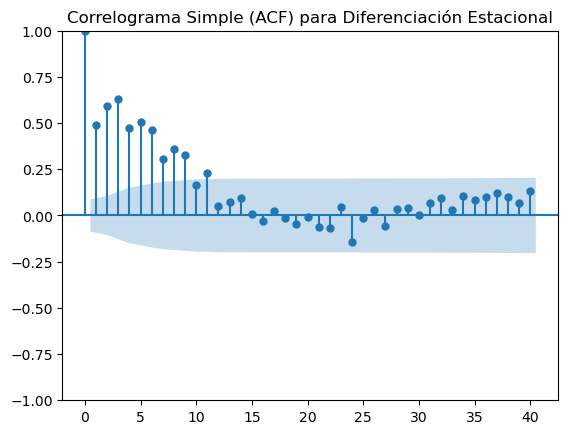

<Figure size 1200x600 with 0 Axes>

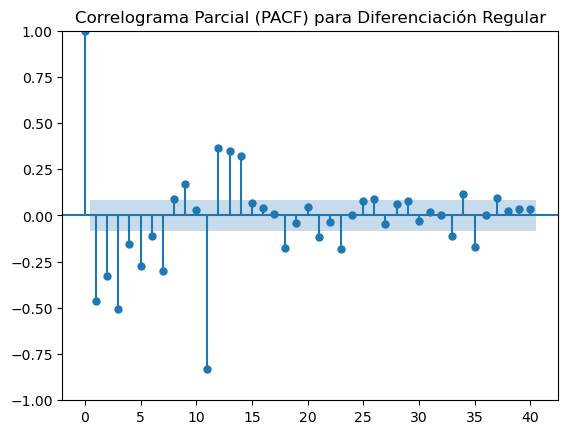

<Figure size 1200x600 with 0 Axes>

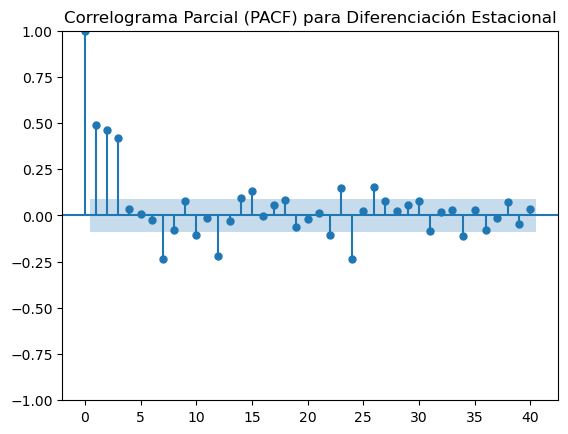

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Diferenciar serie
# Diferenciación regular para tratar la tendencia
diff_regular = entrenamiento['IPI Nacional'].diff().dropna()
# Diferenciación estacional para manejar la estacionalidad 
diff_seasonal = entrenamiento['IPI Nacional'].diff(12).dropna()

# Correlograma simple ACF
# Para la serie diferenciada regular
plt.figure(figsize=(12, 6))
plot_acf(diff_regular, lags=40, title='Correlograma Simple (ACF) para Diferenciación Regular')
plt.show()

# Para la serie diferenciada estacional
plt.figure(figsize=(12, 6))
plot_acf(diff_seasonal, lags=40, title='Correlograma Simple (ACF) para Diferenciación Estacional')
plt.show()


# Correlograma parcial PACF
# Para la serie diferenciada regular
plt.figure(figsize=(12, 6))
plot_pacf(diff_regular, lags=40, title='Correlograma Parcial (PACF) para Diferenciación Regular')
plt.show()

# Para la serie diferenciada estacional
plt.figure(figsize=(12, 6))
plot_pacf(diff_seasonal, lags=40, title='Correlograma Parcial (PACF) para Diferenciación Estacional')
plt.show()

A pesar de la dificultad, intentemos proponer algunos órdenes en lo regular y estcional para un tentativo modelo arima. 

¿Cual sería tu primer modelo a probar según lo que observas en la desaparición de las correlaciones con los retardos?

**Respuesta**: Mi modelo sería ARIMA(1,1,1)(1,1,1)[12]

p=1: Hay un pico significativo inicial en el PACF después de la diferenciación regular, sugiriendo un componente AR de orden 1.

d=1: La serie necesitó una diferenciación regular para hacerla estacionaria, indicando una tendencia no estacional que se elimina con un término de diferenciación de orden 1.

q=1: El ACF muestra varios picos fuera de la zona de confianza después de la diferenciación regular, lo que implica un componente MA de orden 1.

P=1: Un pico significativo en el primer lag estacional del PACF sugiere la necesidad de un componente AR estacional de orden 1.

D=1: Se observa una estacionalidad en los datos, que se maneja con una diferenciación estacional de orden 1.

Q=1: El ACF muestra picos significativos en los lags estacionales, lo que indica un componente MA estacional de orden 1.

s=12: Los datos muestran una estacionalidad anual, que se captura con un ciclo estacional de 12 meses.

## Pregunta 9

Ajusta ese modelo que propones y evalúa su capacidad de ajuste en test y la adecuación de residuos. 

In [20]:
# Ajuste de modelo ARIMA

modelo_arima = sm.tsa.statespace.SARIMAX(entrenamiento['IPI Nacional'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)

resultado_arima = modelo_arima.fit()

C:\Users\leorq\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\leorq\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       IPI Nacional   No. Observations:                  516
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1400.975
Date:                            Wed, 13 Mar 2024   AIC                           2811.951
Time:                                    09:40:56   BIC                           2832.912
Sample:                                01-01-1975   HQIC                          2820.184
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3240      0.053     -6.082      0.000      -0.428      -0.220
ma.L1         -0.5595      0.040   

C:\Users\leorq\AppData\Local\Temp\ipykernel_21164\1611247786.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['Predicciones'] = predicciones.predicted_mean


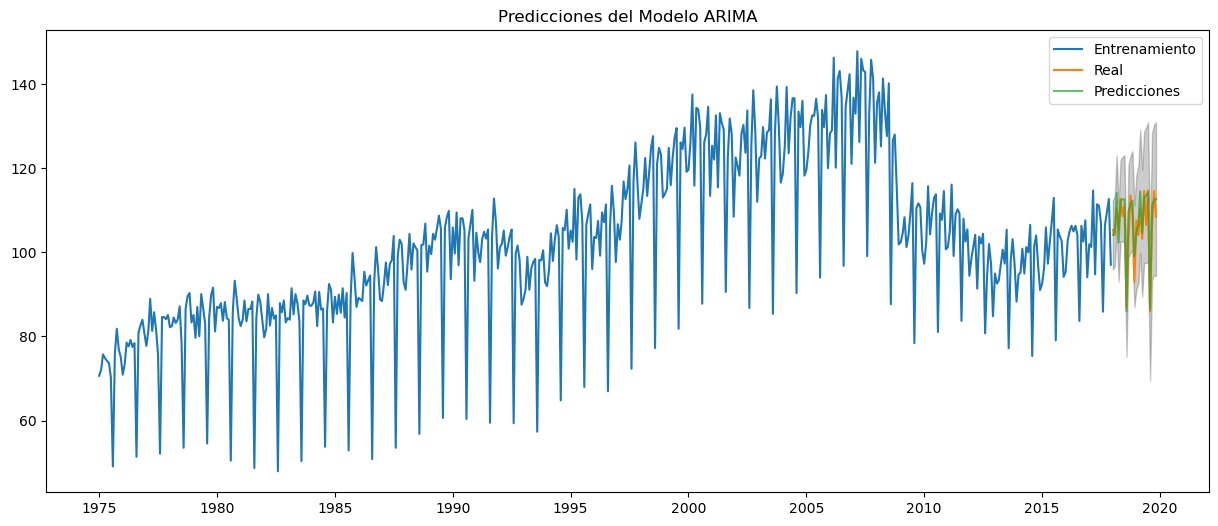

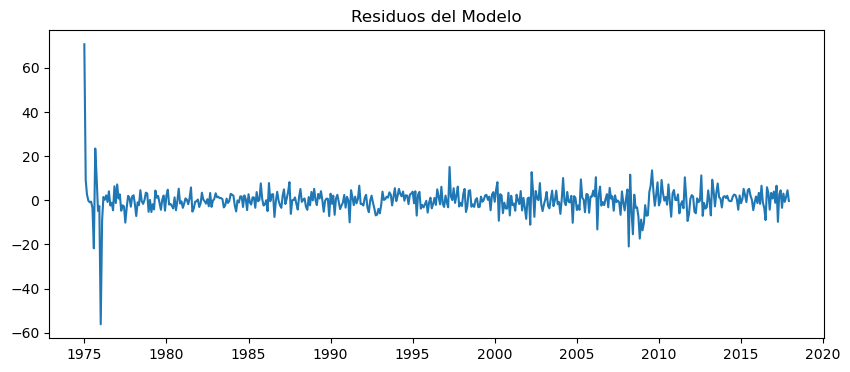

<Figure size 1000x400 with 0 Axes>

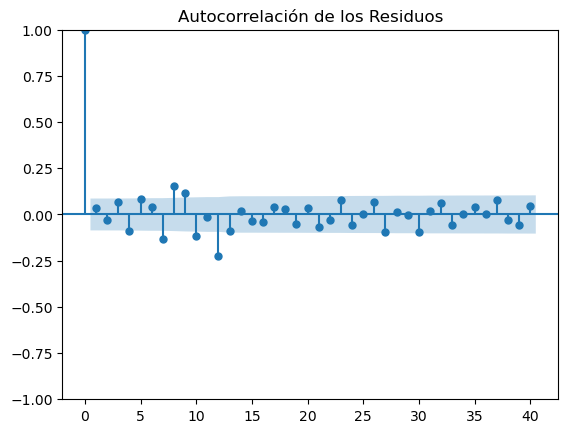

Prueba de Ljung-Box:
      lb_stat     lb_pvalue
10  49.358909  3.500475e-07


In [21]:
# Summary del modelo 
print(resultado_arima.summary())

# Predicciones
predicciones = resultado_arima.get_prediction(start=prueba.index[0], end=prueba.index[-1], dynamic=False)
predicciones_ci = predicciones.conf_int()

# Evaluación de la capacidad de ajuste en test
prueba['Predicciones'] = predicciones.predicted_mean
mse = mean_squared_error(prueba['IPI Nacional'], prueba['Predicciones'])
print(f'El Error Cuadrático Medio (MSE) en la prueba es: {mse}')

# Gráfico para comparar los valores observados con las predicciones
plt.figure(figsize=(15, 6))
plt.plot(entrenamiento['IPI Nacional'], label='Entrenamiento')
plt.plot(prueba['IPI Nacional'], label='Real')
plt.plot(prueba['Predicciones'], label='Predicciones', alpha=0.7)
plt.fill_between(predicciones_ci.index,
                 predicciones_ci.iloc[:, 0],
                 predicciones_ci.iloc[:, 1], color='k', alpha=0.2)
plt.title('Predicciones del Modelo ARIMA')
plt.legend()
plt.show()

# Diagnóstico de residuos
residuos = resultado_arima.resid

# Gráfico de residuos
plt.figure(figsize=(10,4))
plt.plot(residuos)
plt.title('Residuos del Modelo')
plt.show()

# Gráfico de autocorrelación de los residuos
plt.figure(figsize=(10,4))
plot_acf(residuos, lags=40)
plt.title('Autocorrelación de los Residuos')
plt.show()

# Prueba de Ljung-Box para los residuos
ljung_box = sm.stats.acorr_ljungbox(residuos, lags=[10], return_df=True)
print('Prueba de Ljung-Box:')
print(ljung_box)

¿Son todos los efectos significativos en el modelo?

**Respuesta**: De acuerdo con el resumen del modelo ARIMA, todos los coeficientes son estadísticamente significativos, ya que sus valores p son menores a 0.05, lo que sugiere que tienen un impacto significativo en el modelo. El modelo parece ser adecuado, con un AIC de 2811.951 y un BIC de 2832.912, indicando un buen equilibrio entre la adecuación del modelo y la parsimonia. Además, la prueba de Ljung-Box para los residuos muestra un p-valor significativamente bajo, lo que podría indicar que hay alguna autocorrelación residual no capturada por el modelo; sin embargo, este resultado puede ser también una consecuencia de la gran muestra de datos.

El coeficiente ar.L1 cercano a -0.324 sugiere que existe una relación inversa entre el valor actual y su valor previo. El coeficiente ma.L1 de aproximadamente -0.559 indica que el término de media móvil es significativo en el modelo.Los coeficientes estacionales ar.S.L12 y ma.S.L12 sugieren que tanto la autoregresión como la media móvil estacionales son significativas y deben ser consideradas en el modelo.

El modelo identificado SARIMAX(1, 1, 1)(1, 1, 1, 12) parece ser adecuado para los datos y captura tanto la autoregresión como los efectos de la media móvil, junto con sus componentes estacionales.

RMSE: 3.391273393758629


<Figure size 1000x400 with 0 Axes>

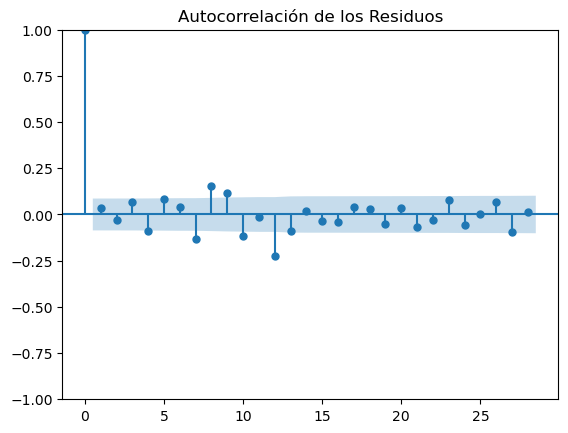

Prueba de Ljung-Box:
      lb_stat     lb_pvalue
12  76.126126  2.249377e-11


In [22]:
# Evaluación del modelo (eval_model)

def eval_model(prueba, predicciones, residuos):
    # Calcula el Root Mean Square Error (RMSE)
    mse = mean_squared_error(prueba['IPI Nacional'], predicciones)
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse}')

    # Gráfico de autocorrelación para los residuos
    plt.figure(figsize=(10,4))
    plot_acf(residuos, alpha=0.05)
    plt.title('Autocorrelación de los Residuos')
    plt.show()

    # Realiza la prueba de Ljung-Box en los residuos
    lb_result = acorr_ljungbox(residuos, lags=[12], return_df=True)
    print(f'Prueba de Ljung-Box:\n{lb_result}')
    
    # Retorna los resultados de la evaluación
    return rmse, lb_result

rmse, lb_result = eval_model(prueba, prueba['Predicciones'], resultado_arima.resid)

¿Es tu modelo válido para la predicción en términos de adecuación residual? En caso contrario, juega con los órdenes para obtener un modelo que satisfaga el test de residuos. ¿Es este modelo aceptable mejor que el suavizado en términos de capacidad de predicción en el conjunto de test? 

**Respuesta**: El modelo ARIMA tiene un RMSE de 3.391, que es ligeramente inferior al RMSE de 3.934 del modelo suavizado exponencial de Holt-Winters, lo que indica una mejor precisión en la muestra de test. Sin embargo, la prueba de Ljung-Box muestra un p-valor muy bajo para el modelo ARIMA (2.249377e-11), lo que sugiere que hay autocorrelación significativa en los residuos y, por lo tanto, el modelo no está capturando toda la información en los datos. Por otro lado, la prueba de Ljung-Box para el modelo suavizado muestra un p-valor de 0.000179, lo cual también indica la presencia de autocorrelación, aunque en menor grado que en el modelo ARIMA.

En términos de adecuación residual, ninguno de los dos modelos es completamente adecuado, aunque el modelo suavizado parece capturar un poco mejor la estructura de dependencia en los datos. Para mejorar el modelo ARIMA, se podría considerar ajustar los órdenes del modelo para tratar de capturar mejor la autocorrelación residual. En cuanto a cuál modelo es preferible, podríamos decir que en términos de RMSE, el modelo ARIMA es ligeramente superior, pero esta ventaja se ve atenuada por la significativa autocorrelación de los residuos. Por lo tanto, podríamos concluir que aún hay espacio para mejorar ambos modelos antes de decidir cuál es el más adecuado para la predicción.

## Pregunta 10

Indica el código necesario para leer el archivo **"clientes_cluster.csv"** y mostrar sus primeros registros. 

In [23]:
# Lectura clientes_cluster
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

clientes = pd.read_csv('C:\\Users\\leorq\\Documents\\LEO\\MASTER UCM DATA SCIENCE, BIG DATA & BUSINESS ANALYTICS\\MODULO 7 - Minería de Datos y Modelización Predictiva\\Tarea Minería de datos 2023-2024\\Práctica Python\\Datos\\clientes_cluster.csv')

clientes.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,15.0,NaN
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,16.0,NaN
4,5,Female,31.0,NaN,40.0


## Pregunta 11

Evalúa la incidencia de valores perdidos por variable e imputa el archivo mediante el método multivariante basado en el algoritmo Iterativo por cadenas de Markov (IterativeImputer), generando un nuevo archivo completo **"clientes_imputed"** del que se mostrará la información para comprobar que efectivamente todos los registros contienen valores válidos.

In [24]:
#Incidencia de missings por variable
clientes.apply(lambda x: x.isna().sum()/x.count()*100)

CustomerID                0.000000
Gender                    8.108108
Age                       6.951872
Annual Income (k$)        4.712042
Spending Score (1-100)    9.890110
dtype: float64

**Comentario**: La incidencia de valores perdidos en el dataset es relativamente baja, con ningún indicador superando el 10%. Esto sugiere que los datos faltantes son manejables y no requieren medidas drásticas como la eliminación de variables completas. La situación permite una imputación cuidadosa, especialmente útil para las variables 'Spending Score (1-100)' y 'Gender', que presentan los porcentajes más altos de datos faltantes. Dada esta incidencia moderada, es viable utilizar técnicas de imputación avanzadas sin el riesgo de introducir sesgos significativos, manteniendo así la integridad y la riqueza del análisis posterior.

Antes de proceder con las imputaciones, y para evitar fallos, recodifica *Gender* como una variable dummy (cualquier opción de código es bienvenida) en formato numérico y elimina el ID de cliente de cara al análisis.

In [25]:
# Recodificación de Gender como dummy
clientes['Gender'] = pd.get_dummies(clientes['Gender'], drop_first=True)

clientes.drop('CustomerID', axis=1, inplace=True)

In [26]:
# Imputación multivariante Iterativa
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Instanciar el imputador iterativo
imputer = IterativeImputer(max_iter=10, random_state=0)

# Realizar la imputación
clientes_imputed = imputer.fit_transform(clientes)

# Convertir el resultado a DataFrame y conservar los nombres de las columnas
clientes_imputed = pd.DataFrame(clientes_imputed, columns=clientes.columns)

# Info del archivo imputado
clientes_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    float64
 1   Age                     200 non-null    float64
 2   Annual Income (k$)      200 non-null    float64
 3   Spending Score (1-100)  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


¿Observas alguna cosa extraña en las imputaciones? En caso afirmativo, ¿cuál es tu conclusión?

**Respuesta:** Después de realizar la imputación multivariante iterativa, se observa que todas las variables, incluida 'Gender', ahora son de tipo float64, lo cual es esperado para variables continuas pero no para 'Gender', que es categórica y binaria. Esta conversión a tipo flotante para una variable originalmente categórica sugiere un paso adicional necesario: redondear y convertir los valores imputados de 'Gender' a enteros para preservar su naturaleza binaria. Este detalle destaca la importancia de ajustar los resultados de la imputación para alinearlos con la interpretación original de cada variable, asegurando así que el tratamiento de los datos permanezca coherente con su significado real. Este proceso mejora la precisión del conjunto de datos imputados y mantiene la validez de las variables categóricas binarias para análisis posteriores.

Como posibilidad para revertir el extraño comportamiento, redondea la variable categórica y conviértela otra vez en entera.

In [27]:
# Arreglo de cosas extrañas en variable categórica
clientes_imputed['Gender'] = clientes_imputed['Gender'].round().astype(int)

## Pregunta 12

Explora los métodos de clustering jerárquico para formar grupos de clientes similares en cuanto a su comportamiento en estas 4 variables disponibles y presenta sus dendogramas.

Vale, pero antes de nada, ¿consideras necesario realizar el escalado de los datos previo al clustering? ¿por qué?

**Respuesta:** Sí, es altamente recomendable escalar los datos antes de realizar el clustering, especialmente en métodos como el clustering jerárquico. El escalado asegura que cada variable contribuya equitativamente al análisis, eliminando el sesgo que puede introducir las diferencias en las escalas y unidades de las variables. Por ejemplo, si una variable se mide en miles y otra en fracciones, la primera dominará indebidamente la medida de distancia (como la euclidiana) utilizada en el clustering, llevando a interpretaciones erróneas sobre la similitud entre los puntos de datos. El escalado (estandarización o normalización) previene este problema, facilitando la identificación de estructuras de agrupación genuinas en los datos.


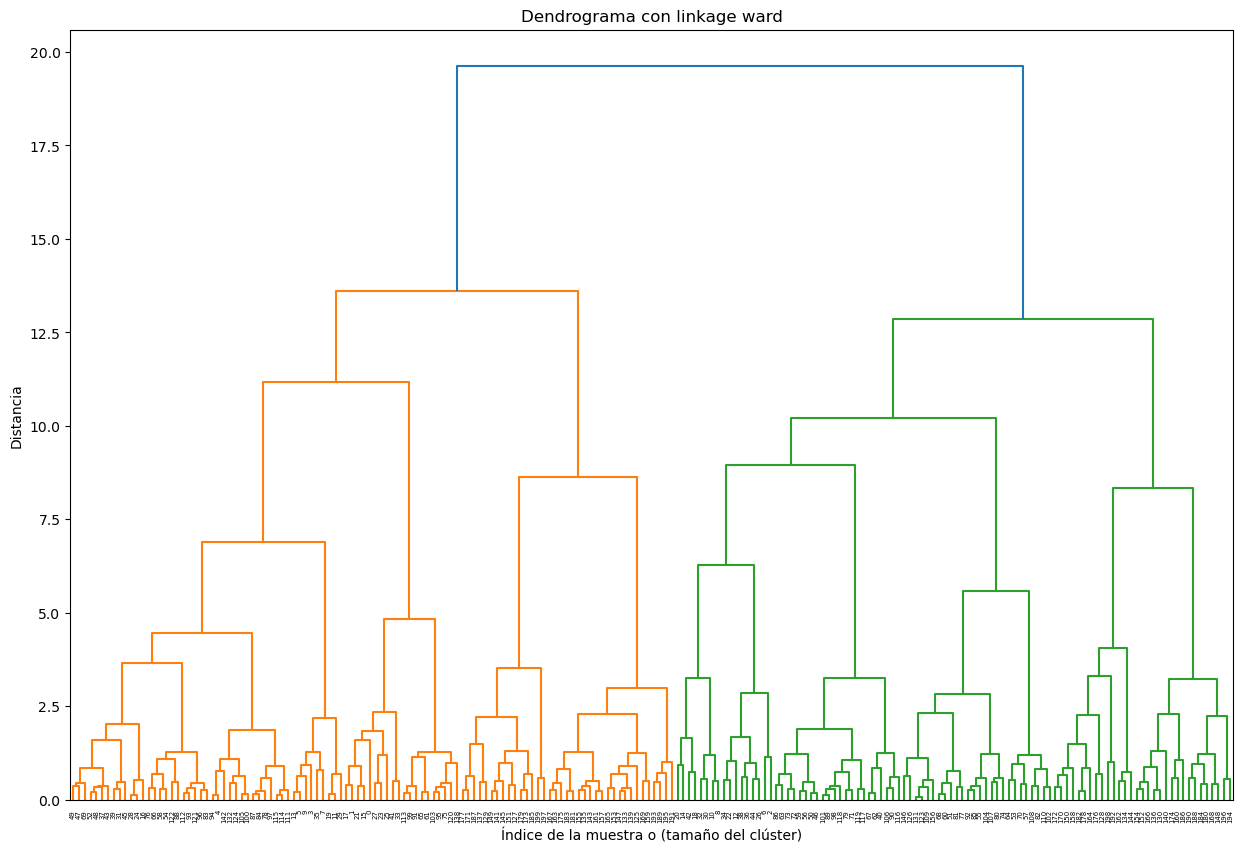

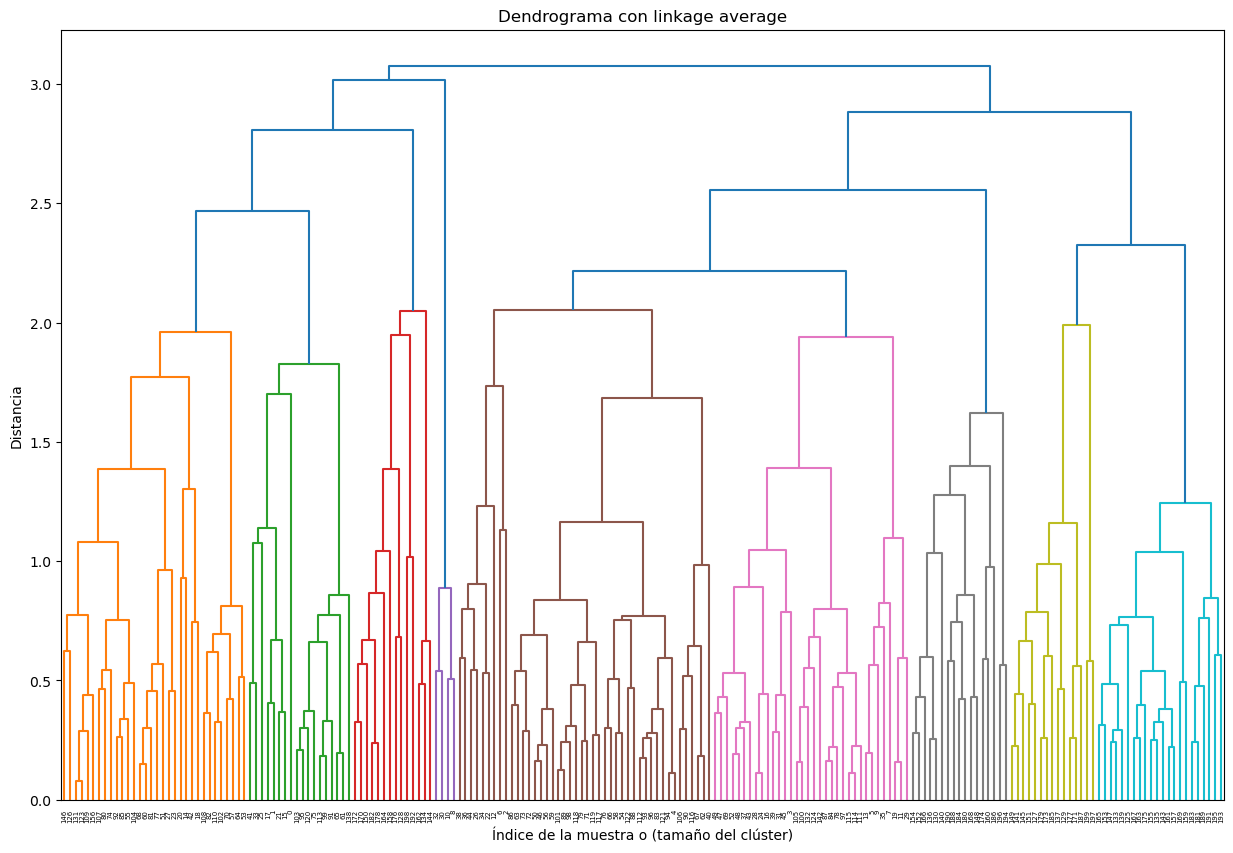

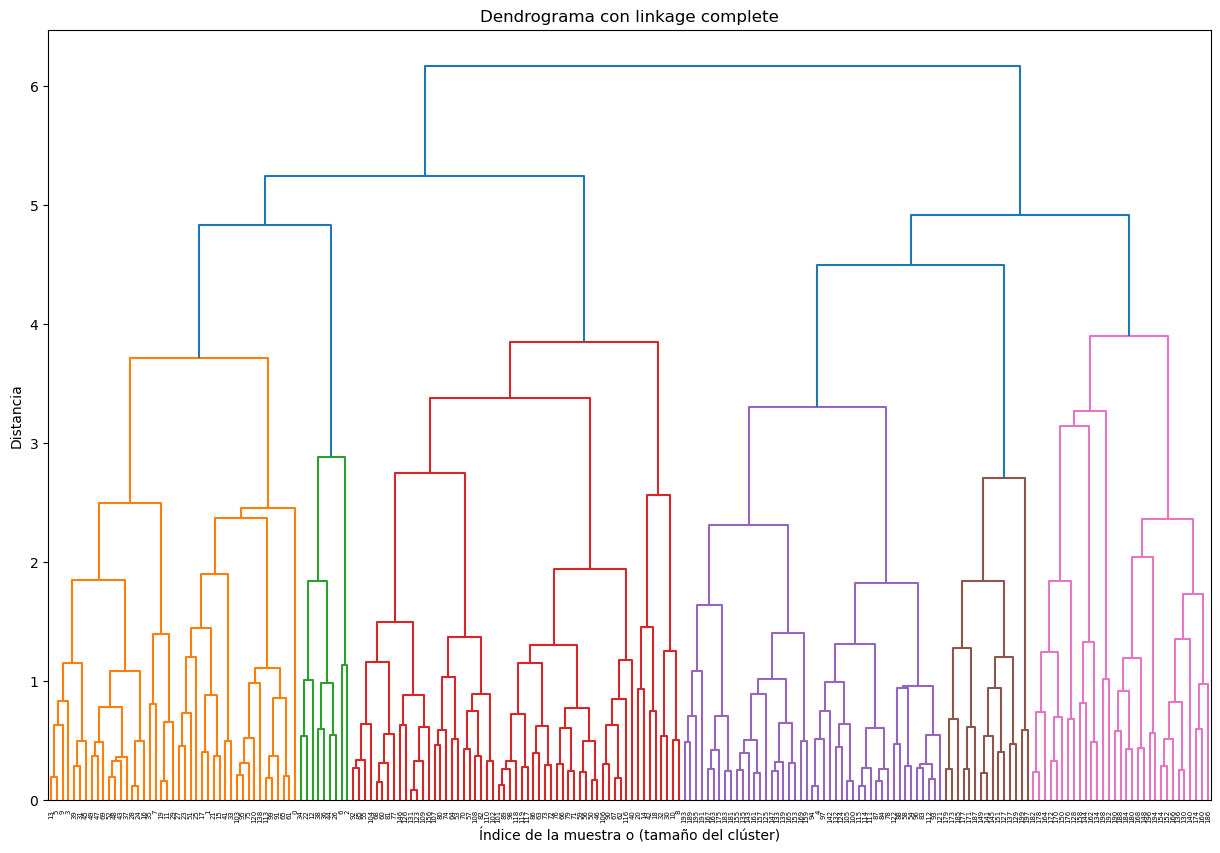

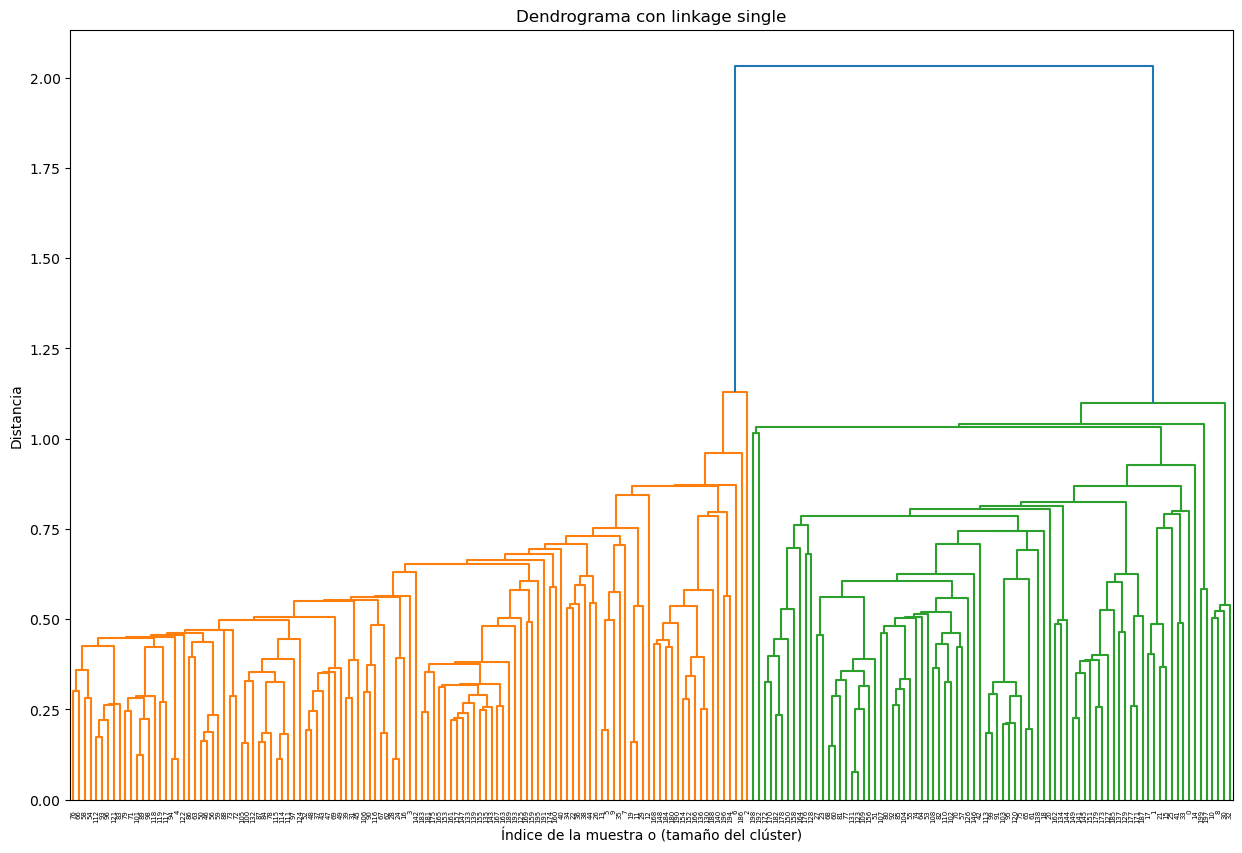

In [30]:
# Clustering jerárquico bucle de dendogramas
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clientes_imputed)

linkage_methods = ["ward", "average", "complete", "single"]

for method in linkage_methods:
    # Calcular el linkage para el método actual
    linked = linkage(X_scaled, method=method)

    # Crear una nueva figura
    plt.figure(figsize=(15, 10))

    # Generar y mostrar el dendrograma
    dendrogram(linked,
               orientation='top',
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f'Dendrograma con linkage {method}')
    plt.xlabel('Índice de la muestra o (tamaño del clúster)')
    plt.ylabel('Distancia')
    plt.show()

¿Cuál es el método de linkage más adecuado a la vista de los dendogramas? ¿Cuantos grupos de clientes formarías en base a las alturas del dendograma del linkage escogido?

**Respuesta**: El método de linkage más adecuado a la vista de los dendogramas para mi seria el de Ward, ya que muestra una estructura de cluster más clara y balanceada, con grupos bien definidos y homogéneros.

Con base a las altura del dendograma escogido, realizando un corte alrededor del eje Y en la distancia 12.0, me generaria 4 grupos. 

## Pregunta 13

Explora el clustering K-means con distinto número de grupos y decide cuantos el número de clusters óptimo para la solución según este método. Comenta las métricas de evaluación.

C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número de clusters: 2
La media de Silhouette Score es: 0.2820593389519639
La inercia (varianza intra-cluster) es: 599.3221874637828
El score de Calinski-Harabasz es: 66.29857481218669
--------------------------------------------------------------------------------


C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número de clusters: 3
La media de Silhouette Score es: 0.24895329091590088
La inercia (varianza intra-cluster) es: 486.20357504411993
El score de Calinski-Harabasz es: 63.572029175946305
--------------------------------------------------------------------------------


C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número de clusters: 4
La media de Silhouette Score es: 0.2804358494874384
La inercia (varianza intra-cluster) es: 398.1740410405956
El score de Calinski-Harabasz es: 65.9325486163587
--------------------------------------------------------------------------------


C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número de clusters: 5
La media de Silhouette Score es: 0.29270544942107213
La inercia (varianza intra-cluster) es: 336.78954278792276
El score de Calinski-Harabasz es: 67.04931988731134
--------------------------------------------------------------------------------


C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número de clusters: 6
La media de Silhouette Score es: 0.30534160956422196
La inercia (varianza intra-cluster) es: 283.978717208106
El score de Calinski-Harabasz es: 70.50396582238658
--------------------------------------------------------------------------------


C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número de clusters: 7
La media de Silhouette Score es: 0.33583383860462346
La inercia (varianza intra-cluster) es: 248.11842014018305
El score de Calinski-Harabasz es: 71.54725073936228
--------------------------------------------------------------------------------


C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número de clusters: 8
La media de Silhouette Score es: 0.32663700289246606
La inercia (varianza intra-cluster) es: 227.90065527784134
El score de Calinski-Harabasz es: 68.85398254700128
--------------------------------------------------------------------------------


C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número de clusters: 9
La media de Silhouette Score es: 0.35958885657306416
La inercia (varianza intra-cluster) es: 191.39963967191392
El score de Calinski-Harabasz es: 75.91620145022274
--------------------------------------------------------------------------------


C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número de clusters: 10
La media de Silhouette Score es: 0.36297201472705654
La inercia (varianza intra-cluster) es: 174.87117928711393
El score de Calinski-Harabasz es: 75.46791899401393
--------------------------------------------------------------------------------


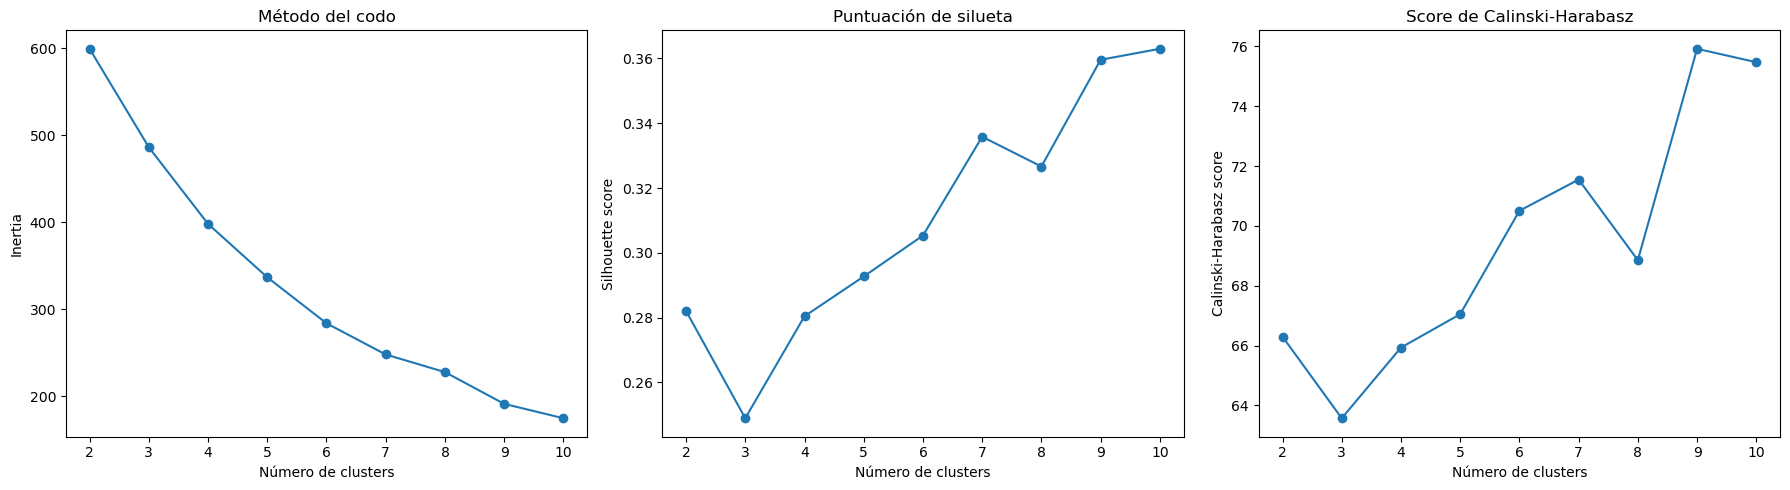

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import scale

# Escalado de las variables
# (Quita la columna 'Cluster' si existe, de lo contrario, omite esta línea)
if 'Cluster' in clientes_imputed.columns:
    X = clientes_imputed.drop(columns=['Cluster'])
else:
    X = clientes_imputed.copy()
    
X_scaled = scale(X)

# Clustering k-means evaluación número clusters
# Rango de número de clusters que queremos explorar
num_clusters = range(2, 11)
inertias = []
silhouettes = []
calinski_scores = []

# Preparar las figuras para los gráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Bucle sobre el rango de número de clusters
for k in num_clusters:
    modelo_kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    modelo_kmeans.fit(X_scaled)
    
    inertias.append(modelo_kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, modelo_kmeans.labels_)
    silhouettes.append(silhouette_avg)
    calinski_harabasz = calinski_harabasz_score(X_scaled, modelo_kmeans.labels_)
    calinski_scores.append(calinski_harabasz)
    
    print(f'Número de clusters: {k}')
    print('La media de Silhouette Score es:', silhouette_avg)
    print('La inercia (varianza intra-cluster) es:', modelo_kmeans.inertia_)
    print('El score de Calinski-Harabasz es:', calinski_harabasz)
    print('-'*80)

# Graficar la varianza intra-cluster (inertia)
axs[0].plot(num_clusters, inertias, '-o')
axs[0].set_title('Método del codo')
axs[0].set_xlabel('Número de clusters')
axs[0].set_ylabel('Inertia')

# Graficar la media del índice de silueta
axs[1].plot(num_clusters, silhouettes, '-o')
axs[1].set_title('Puntuación de silueta')
axs[1].set_xlabel('Número de clusters')
axs[1].set_ylabel('Silhouette score')

# Graficar el score de Calinski-Harabasz
axs[2].plot(num_clusters, calinski_scores, '-o')
axs[2].set_title('Score de Calinski-Harabasz')
axs[2].set_xlabel('Número de clusters')
axs[2].set_ylabel('Calinski-Harabasz score')

plt.tight_layout()
plt.show()

**Respuesta**:  Tras analizar la varianza intra-cluster mediante el método del codo, la puntuación de silueta y el score de Calinski-Harabasz para diferentes números de clusters, he determinado que el número óptimo de clusters para este conjunto de datos es de 10. Este número de clusters presenta la puntuación de silueta más alta y un score de Calinski-Harabasz competitivo, lo que indica una buena separación y cohesión entre los grupos. Aunque normalmente se busca un 'codo' claro en el gráfico de inercia para decidir el número de clusters, en este caso, las otras dos métricas muestran una mejora consistente y un aumento en el valor hasta 10 clusters, sugiriendo que agregar más clusters sigue siendo beneficioso para la estructura de datos. Además, la puntuación de silueta muestra su máximo en 10 clusters, lo que sugiere que es el balance óptimo entre la cohesión interna y la separación entre clusters. Por lo tanto, considero que 10 clusters es la elección más adecuada para maximizar la distinción entre los grupos y la interpretación significativa de los resultados del clustering.

Ajusta el clustering K-means con el núemero de grupos seleccionado y genera una nueva variable en el conjunto de datos imputado llamada *'Cluster'* que recoja el número de grupo asignado a cada registro. El tipo de la variable debe ser entero (int).  

In [43]:
X_scaled = scale(clientes_imputed)

# Ajuste de k-means
# El número óptimo es 10, dicho anteriormente
modelo_kmeans_optimo = KMeans(n_clusters=10, n_init=10, random_state=42)
modelo_kmeans_optimo.fit(X_scaled)

# Creación de variable cluster 
clientes_imputed['Cluster'] = modelo_kmeans_optimo.labels_.astype(int)

# Comprobar los primeros registros para confirmar que la variable 'Cluster' se ha creado correctamente
clientes_imputed.head()

C:\Users\leorq\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19.0,15.000000,39.000000,1
1,1,21.0,15.000000,58.149751,1
2,0,20.0,16.000000,6.000000,7
3,0,23.0,16.000000,57.142030,3
4,0,31.0,60.584564,40.000000,7


Extrae los centroides de los grupos y comenta las principales características de cada grupo formado. 

In [46]:
# Centroides
centroides = modelo_kmeans_optimo.cluster_centers_

# Convertir los centroides a un DataFrame para una mejor legibilidad
# Excluyendo la columna 'Cluster'
centroides_df = pd.DataFrame(centroides, columns=clientes_imputed.columns[:-1])

print("Centroides de cada cluster:")
print(centroides_df)
centroides_df = centroides_df.round(2)

Centroides de cada cluster:
     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  0.679897  1.211441           -1.426414               -1.616003
1  1.187282 -0.816215           -0.590978                0.319454
2 -0.842260  1.118828           -0.390520               -0.186799
3 -0.842260 -0.748632           -1.314342                0.801889
4  1.187282 -0.084919            1.039857               -1.493793
5  1.187282 -0.423372            1.084135                1.295247
6 -0.842260 -0.457361            0.981557                1.265578
7 -0.842260 -0.664728           -0.241864               -0.269963
8  1.187282  1.469294           -0.150192               -0.176463
9 -0.842260  0.457039            1.162018               -1.135923


**Comentarios**: Los centroides de los clusters revelan patrones distintos en las preferencias y características demográficas de los clientes. Por ejemplo, el Cluster 0 agrupa a clientes que podrían ser mayores y más conservadores en sus gastos, dada su baja puntuación en ingresos y gasto. En contraste, el Cluster 5 incluye clientes con ingresos y gastos superiores a la media, lo que podría indicar un segmento de mercado con mayor poder adquisitivo y dispuesto a gastar más.

## Pregunta 14

De cara a la proyección de los grupos formados en el espacio de características y dado que estamos en R4. Nos planteamos reducir la dimensionalidad a 2 para poder interpretar con mayor claridad mediante un bonito biplot. 

Para llevar a cabo esta tarea, necesitaremos ajustar un PCA con 2 dimensiones a los **datos de entrada al clustering** que hemos generado, es decir, tal vez utilizamos el conjunto de datos escalado si lo consideramos necesario. Mostraremos las cargas de las variables en las componentes y haremos una pequeña interpretación inicial de las 2 componentes.


                             PC1       PC2
Gender                  0.144330  0.701998
Age                     0.804675 -0.003403
Annual Income (k$)     -0.094002  0.739914
Spending Score (1-100) -0.811487  0.035771


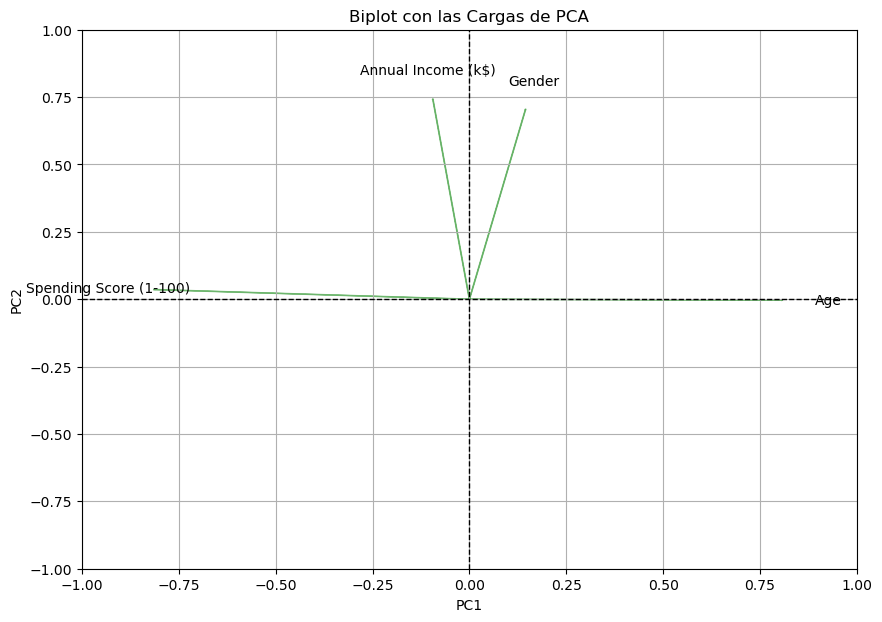

In [49]:
from sklearn.decomposition import PCA

# Ajuste PCA 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Análisis de cargas
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame para una mejor visualización de las cargas
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=clientes_imputed.columns[:-1]) # Excluyendo 'Cluster'
print(loadings_df)

# Visualización de las cargas en un biplot
plt.figure(figsize=(10, 7))
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='g', alpha=0.5)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, loadings_df.index[i], color='black', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot con las Cargas de PCA')
plt.grid(True)
plt.axhline(0, color='black', lw=1, ls='--')
plt.axvline(0, color='black', lw=1, ls='--')
plt.show()

**Interpretación inicial**: El análisis de PCA sugiere que la 'Edad' y la 'Puntuación de Gasto (1-100)' tienen una influencia significativa en la primera componente principal, destacando una relación inversa entre ambas; es decir, a medida que aumenta la edad, tiende a disminuir la puntuación de gasto. Por otro lado, el 'Género' y el 'Ingreso Anual (k$)' son más relevantes para la segunda componente principal, indicando una posible relación entre el género y los ingresos. Este biplot ofrece una visión simplificada y clara de cómo estas cuatro características se relacionan entre sí, permitiendo una interpretación más intuitiva de las dinámicas subyacentes en los datos.

Ahora generamos y mostramos el biplot para interpretar con mayor seguridad las componentes. 

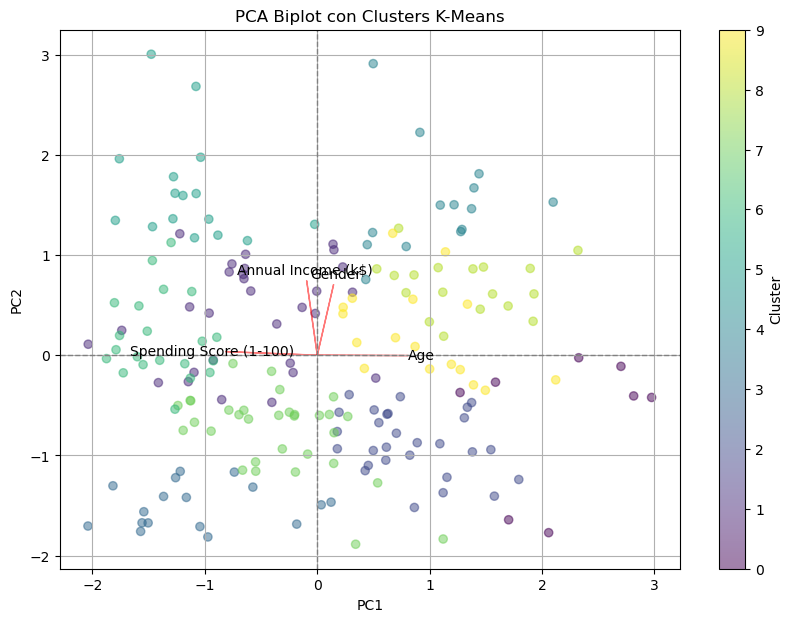

In [52]:
# Biplot
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=modelo_kmeans.labels_, cmap='viridis', alpha=0.5)

for i, name in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, name, color='black', ha='center', va='center')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot con Clusters K-Means')
plt.grid(True)
plt.axhline(0, color='grey', lw=1, linestyle='--')
plt.axvline(0, color='grey', lw=1, linestyle='--')
plt.colorbar(label='Cluster')
plt.show()

**Interpretación gráfica**: El biplot muestra cómo las observaciones se agrupan en el espacio reducido de las dos principales componentes del PCA, coloreadas según su asignación al cluster K-means. Se observa que la 'Edad' tiene un peso significativo en la PC1, mientras que el 'Ingreso Anual' y el 'Género' predominan en la PC2, sugiriendo que estas características son determinantes en la variabilidad de los datos. Los clusters están dispersos, indicando una diversidad en los patrones de comportamiento de los clientes. Cada cluster representa un grupo único con características distintivas, lo que es esencial para estrategias de mercado dirigidas y personalizadas.

Ahora que sabemos lo que represanta cada componente en el espacio original de las variables, necesitamos un conjunto de datos que contenga las columnas *PC1*,*PC2* y *Cluster* para realizar la representación de los clientes por grupos propuestos e interpretar las características de los grupos en el espacio de las componentes. 

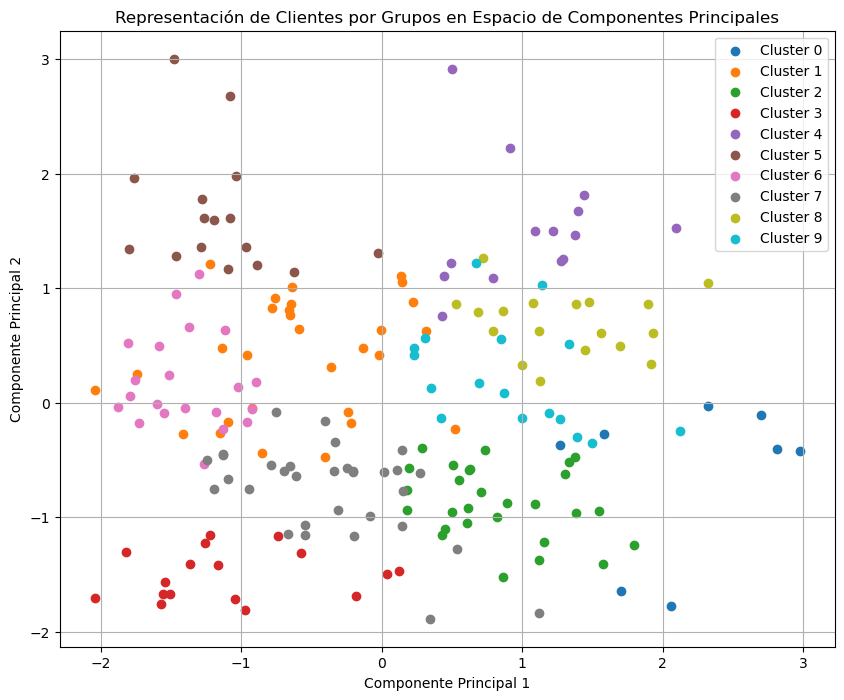

In [53]:
# Creación dataset dimensión reducida
df_pca_cluster = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': modelo_kmeans.labels_
})

# Representación de grupos en espacio de componentes
plt.figure(figsize=(10, 8))

# Graficar cada cluster para ver cómo se distribuyen a lo largo de las dos principales componentes
for cluster in np.unique(df_pca_cluster['Cluster']):
    plt.scatter(df_pca_cluster[df_pca_cluster['Cluster'] == cluster]['PC1'], 
                df_pca_cluster[df_pca_cluster['Cluster'] == cluster]['PC2'], 
                label=f'Cluster {cluster}')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Representación de Clientes por Grupos en Espacio de Componentes Principales')
plt.legend()
plt.grid(True)
plt.show()

**Interpretación de biplot**: El gráfico muestra la distribución de los clientes en el espacio de dos componentes principales derivadas de PCA, con cada color representando un cluster diferente asignado por el método K-means. Se observa que los clusters tienen tendencias distintas en el espacio de componentes, lo cual podría reflejar patrones de comportamiento de compra, demográficos o de ingresos/gastos. Por ejemplo, algunos clusters están más agrupados, lo que sugiere características homogéneas dentro de esos grupos, mientras que otros están más dispersos. La separación entre clusters indica que el PCA ha hecho un buen trabajo al condensar las características en dos dimensiones de manera que los grupos son distinguibles, lo que puede ser útil para desarrollar estrategias de marketing dirigidas y personalizadas.